# Projet d’Algorithmique des graphes :


## Quelques algorithmes d’approximation pour le problème du voyageur de commerce






## 1-Répresentation du problème




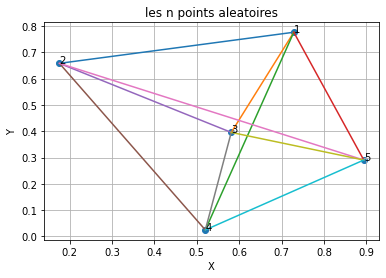

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# n pour le nombre des sommets
n=5
#coordonn´ees al´eatoirement 
pi=np.random.rand(n)
pj=np.random.rand(n)
# Créer une nouvelle figure
fig, ax = plt.subplots()
plt.scatter(pi, pj)
# ajouter l'indice i sur chaque point
for i in range(n):
    plt.text(pi[i], pj[i], str(i+1))
# tracer des segments entre tous les points
for i in range(n):
    for j in range(i+1, n):
        plt.plot([pi[i], pi[j]], [pj[i], pj[j]], '-')


ax.set_title('les n points aleatoires')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

plt.show()


# 2-Quatre algorithmes d’approximation

## 2.1 L’algorithme du plus proche voisin

In [2]:
import math as m
# la matrice des poids.
def matriceD(pi,pj):
    d= [[0]*n for i in range(n)]
    for i in range(n):
        for j in range(n):
            d[i][j]=m.sqrt((pi[i]-pi[j])**2+(pj[i]-pj[j])**2)
    return d
D=matriceD(pi,pj)

#masque pour les poids nulls
d1 = np.ma.masked_equal(D, 0.0, copy=False)


In [3]:
def Ppvoisin(s, d):
    # Nombre de sommets dans le graphe
    n = len(d)
     # Initialement tous les sommets sont non visités
    unvisited = set(range(1, n+1))
    # Initialisation du chemin avec le sommet de départ
    path = [s] 
     # Le sommet de départ est maintenant visité
    unvisited.remove(s)
     # Le sommet courant est le sommet de départ
    current = s
    # Tant qu'il reste des sommets à visiter
    while unvisited: 
        # Trouver le sommet non visité le plus proche du sommet courant
        next_vertex = min(unvisited, key=lambda vertex: d[current-1][vertex-1])
        current = next_vertex # Le sommet courant est maintenant le sommet non visité le plus proche
        unvisited.remove(current) # Le sommet courant est maintenant visité
        path.append(current) # Ajouter le sommet courant au chemin
    path.append(s) # Ajouter le sommet de départ à la fin pour fermer le cycle
    return path
cycle=Ppvoisin(2,d1)
cycle

[2, 3, 5, 4, 1, 2]

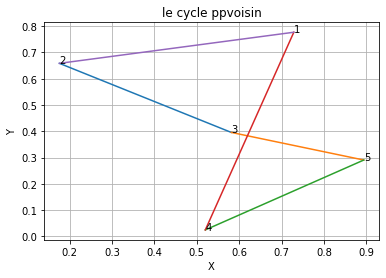

In [4]:
# Créer une nouvelle figure
fig, ax = plt.subplots()

# tracer le chemin entre les points
for i in range(n):
    plt.plot([pi[cycle[i]-1], pi[cycle[i+1]-1]], [pj[cycle[i]-1], pj[cycle[i+1]-1]], '-')
# afficher le graphique
for i in range(n):
    ax.text(pi[i], pj[i], i+1)
    

ax.set_title('le cycle ppvoisin')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()


plt.show()

In [5]:
def listdarc(pi, pj):
    edges = {}
    n = len(pi)
    for i in range(1,n+1):
        for j in range(1,n+1):
            d = m.sqrt((pi[i-1]-pi[j-1])**2+(pj[i-1]-pj[j-1])**2)
            if d > 0:
                edges[(i,j)] = {'weight': d}
    return edges


edges=listdarc(pi, pj)




## 2.2 Défaire les croisements

In [6]:
# Fonction qui permet de défaire les décroisements d'un graphe en comparant les poids des arretes et puis retourner le nouveau
# cycle modifié aprés modification de ce dernier
listeDesArcs=edges
def OptimisePpvoisin(L):
    n = len(L)
    for i in range(n):
        for j in range(i+2, n):
            u, v, w, x = L[i], L[(i+1) % n], L[j], L[(j+1) % n]
            if ((u,v) in listeDesArcs) and ((w,x) in listeDesArcs):
                # Verifie si le decroisement de (u,v) et (w,x) est avantageux
                poids_arcs = listeDesArcs[(u,w)]['weight'] + listeDesArcs[(v,x)]['weight'] - (listeDesArcs[(u,v)]['weight'] + listeDesArcs[(w,x)]['weight'])
                if poids_arcs < 0:
                    # decroisement de (u,v) et (w,x)
                    L[i+1], L[j] = L[j], L[i+1]
    return L
l1 = OptimisePpvoisin(cycle)
print(l1)

def calcul_coup(l):
    coup = 0
    for i in range(len(l) - 1):
        coup += listeDesArcs[(l[i],l[(i+1)% len(l)] )]['weight']
    return coup

[2, 4, 5, 3, 1, 2]


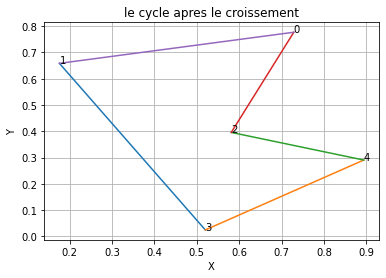

In [7]:

fig, ax = plt.subplots()
# tracer le chemin entre les points
for i in range(n):
    plt.plot([pi[l1[i]-1], pi[l1[i+1]-1]], [pj[l1[i]-1], pj[l1[i+1]-1]], '-')

# afficher le graphique
for i in range(n):
    ax.text(pi[i], pj[i], i)
    

ax.set_title('le cycle apres le croissement')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

plt.show()

## 2.3 L’arete de poids minimum


In [8]:
def listdarc1(pi, pj):
    edges = {}
    n = len(pi)
    for i in range(n):
        for j in range(n):
            d = m.sqrt((pi[i]-pi[j])**2+(pj[i]-pj[j])**2)
            if d > 0:
                edges[(i,j)] = {'weight': d}
    return edges


edges1=listdarc1(pi, pj)


In [9]:

 class EnsembleDisjoint:
   
    parent = {}

    # Création de n ensemble disjoints, état de départt de notre graphe
    def __init__(self, N):
        for i in range(N):
            self.parent[i] = i

    # Fonction qui permet de retrouver le parent le plus lointain
    def get_parent(self, k):
        if self.parent[k] == k:
            return k

        return self.get_parent(self.parent[k])

    # Union de deux ensembles jusque là disjoints
    def Union(self, a, b):
        x = self.get_parent(a)
        y = self.get_parent(b)

        self.parent[x] = y
            

In [10]:
def Apminimum1(edges, n):
    # Initialiser une liste vide pour stocker LA LISTE finale
    mst = []
    # Trier les arêtes dans l'ordre croissant de leur poids
    edges = sorted(edges.items(), key=lambda x: x[1]['weight'])
    # Créer un objet de la classe EnsembleDisjoint
    ed = EnsembleDisjoint(n)
    # Initialiser l'index à 0
    index = 0

    while len(mst) != n - 1:
        # Obtenir l'arête à l'index courant
        (src, dest), weight = edges[index]
        index += 1
        # Obtenir les parents des sommets source et destination
        x = ed.get_parent(src)
        y = ed.get_parent(dest)

        if x != y:
            # Si les sommets sont dans des ensembles différents, ajoutez l'arête à la LISTE.
            mst.append((src, dest,weight))
            ed.Union(x, y)

    return mst

acm=Apminimum1(edges1,n)
liste2 = [tuple(i) for i in np.delete(acm, 2, 1).tolist()]
s = 0


In [11]:
def poids_total(acm):
    poids_total = 0
    for i in range(len(acm)):
        poids_total += acm[i][2]['weight']
    return poids_total
poids_total(acm)

1.5976719448468533

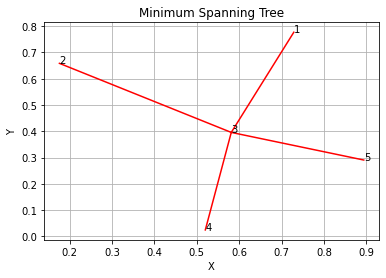

In [12]:
# Créer une nouvelle figure
fig, ax = plt.subplots()

# Add the edges from the minimum spanning tree to the graph
for src, dest in liste2:
    ax.plot([pi[src], pi[dest]], [pj[src], pj[dest]], '-', c='r')

# Add node labels
for i in range(n):
    ax.text(pi[i], pj[i], i+1)
    
# Customize the plot
ax.set_title('Minimum Spanning Tree')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Show the plot
plt.show()

## 2.4 Utiliser l’arbre couvrant de poids minimum


In [13]:
#Une fonction qui convertit une matrice des poids en liste d'arcs
def MatAToLV(M): 
    l=[]
    k=0
    for i in M:
        k=k+1
        kk=0
        for j in i:
            kk=kk+1
            l.append((k,kk,j))
    return(l)

In [14]:
class Tas:
    def __init__(self,tailleMax):
        self.storage = [(0,0,0)] * tailleMax
        self.tailleMax = tailleMax
        self.taille = 0
    
    def index_enfant_gauche(self,index):
        return 2 * index + 1

    def index_enfant_droit(self,index):
        return 2 * index + 2

    def index_parent(self,index):
        return (index - 1) // 2

    def hasfils_gauche(self,index):
        return self.index_enfant_gauche(index) < self.taille

    def hasfils_droit(self,index):
        return self.index_enfant_droit(index) < self.taille

    def hasParent(self,index):
        return self.index_parent(index) >= 0
    
    def fils_gauche(self,index):
        return self.storage[self.index_enfant_gauche(index)]
    
    def fils_droit(self,index):
        return self.storage[self.index_enfant_droit(index)]
    
    def parent(self,index):
        return self.storage[self.index_parent(index)]
    
    def isFull(self):
        return self.taille == self.tailleMax 

    def swap(self,index1,index2):
        temp = self.storage[index1]
        self.storage[index1] = self.storage[index2]
        self.storage[index2] = temp
    
    def supprimerMin(self):
        if(self.taille == 0):
            raise("Empty Heap")
        data = self.storage[0]
        self.storage[0] = self.storage[self.taille - 1]
        self.taille -= 1
        self.versLeBas(0)
        return data
    
    def versLeBas(self,index):
        smallest = index
        if(self.hasfils_gauche(index) and self.storage[smallest][2] > self.fils_gauche(index)[2]):
            smallest = self.index_enfant_gauche(index)
        if(self.hasfils_droit(index) and self.storage[smallest][2] > self.fils_droit(index)[2]):
            smallest = self.index_enfant_droit(index)
        if(smallest != index):
            self.swap(index,smallest)
            self.versLeBas(smallest)
    
    def inserer(self,data):
        if(self.isFull()):
            raise Exception("Tas est complet")
        self.storage[self.taille] = data 
        self.taille += 1
        self.versLeHaut(self.taille - 1)

    def versLeHaut(self,index):
        if(self.hasParent(index) and self.parent(index)[2] > self.storage[index][2]):
            self.swap(index,self.index_parent(index))
            self.versLeHaut(self.index_parent(index))

    def printh(self):
        print(self.storage[:self.taille])

    


In [15]:
def prim(g):
    gg=g.copy()
    t=[1]
    sol=[]
    h=Tas(len(g))
    while(len(t)!=len(D)):
        for i in g:
            if(i[0] in t):
                h.inserer(i)
                gg.remove(i)
            elif(i[1] in t):
                h.inserer(i)
                gg.remove(i)

        g=gg.copy()
        #h.printh()
        #print(t)
        s=h.supprimerMin()
        if((s[0] not in t and s[1] in t)   ):
            sol.append(s)
            t.append(s[0])
        if((s[0]  in t and s[1] not in t)   ):
            sol.append(s)
            t.append(s[1])


    return(sol)

In [16]:
#fonction qui convertit une liste d'arcs en liste d'adjacence
def LacToLad(l):
    index={} 
    for i in l:
        if(index.get(i[0])==None):
            index[i[0]]=[]         
        if i[1] not in index[i[0]]:    
            index[i[0]].append(i[1]) 
        if(index.get(i[1])==None):
            index[i[1]]=[]         
        if i[0] not in index[i[1]]:   
            index[i[1]].append(i[0])  
    return index

In [17]:
def parcoursPref(visited, graph, node, l):  
    if node not in visited:
        l.append(node)
        visited.add(node)
        for neighbour in graph[node]:
            parcoursPref(visited, graph, neighbour, l)

In [18]:
def Pvcprim(graph):
    visited = set() 
    l=[]
    parcoursPref(visited, graph, 1, l)
    return l


In [19]:
print(d1)

[[-- 0.5654292367607495 0.4087186336337116 0.7806140776956088
  0.5135273349435738]
 [0.5654292367607495 -- 0.48311551439577755 0.7212442706495495
  0.8067583480703919]
 [0.4087186336337116 0.48311551439577755 -- 0.3760380334676866
  0.32979976334967764]
 [0.7806140776956088 0.7212442706495495 0.3760380334676866 --
  0.45874847606936314]
 [0.5135273349435738 0.8067583480703919 0.32979976334967764
  0.45874847606936314 --]]


In [20]:

c=Pvcprim(LacToLad(prim(MatAToLV(d1))))
c

[1, 3, 5, 4, 2]

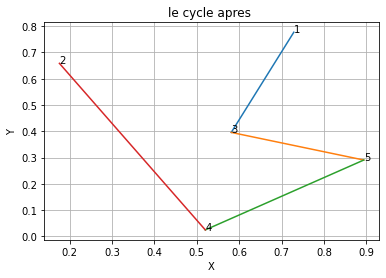

In [21]:
fig, ax = plt.subplots()
# tracer le chemin entre les points
for i in range(n-1):
    plt.plot([pi[c[i]-1], pi[c[i+1]-1]], [pj[c[i]-1], pj[c[i+1]-1]], '-')

# afficher le graphique
for i in range(n):
    ax.text(pi[i], pj[i], i+1)
    

ax.set_title('le cycle apres ')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

plt.show()

In [31]:
d1

masked_array(
  data=[[--, 0.5654292367607495, 0.4087186336337116, 0.7806140776956088,
         0.5135273349435738],
        [0.5654292367607495, --, 0.48311551439577755, 0.7212442706495495,
         0.8067583480703919],
        [0.4087186336337116, 0.48311551439577755, --, 0.3760380334676866,
         0.32979976334967764],
        [0.7806140776956088, 0.7212442706495495, 0.3760380334676866, --,
         0.45874847606936314],
        [0.5135273349435738, 0.8067583480703919, 0.32979976334967764,
         0.45874847606936314, --]],
  mask=[[ True, False, False, False, False],
        [False,  True, False, False, False],
        [False, False,  True, False, False],
        [False, False, False,  True, False],
        [False, False, False, False,  True]],
  fill_value=0.0)

## 2.5 L’heuristique de la demi-somme

In [22]:
import math
maxsize = float('inf')
 
# Fonction permettant de copier la solution temporaire
# vers la solution finale
def copyToFinal(curr_path):
    final_path[:N + 1] = curr_path[:]
    final_path[N] = curr_path[0]
 
# Fonction permettant de trouver le coût minimal d'une arête
# ayant une extrémité au sommet i
def firstMin(adj, i):
    min = maxsize
    for k in range(N):
        if adj[i][k] < min and i != k:
            min = adj[i][k]
 
    return min
 
# fonction pour trouver le deuxième bord minimum
# coût minimum ayant une extrémité au sommet i
def secondMin(adj, i):
    first, second = maxsize, maxsize
    for j in range(N):
        if i == j:
            continue
        if adj[i][j] <= first:
            second = first
            first = adj[i][j]
 
        elif(adj[i][j] <= second and
             adj[i][j] != first):
            second = adj[i][j]
 
    return second
 
# fonction qui prend comme arguments :
# curr_bound -> limite inférieure du noeud racine
# curr_weight-> stocke le poids du chemin jusqu'à présent
# level-> niveau actuel pendant le déplacement
# dans l'arbre de l'espace de recherche
# curr_path[] -> où la solution est stockée
# qui sera plus tard copiée dans final_path[]
def TSPRec(adj, curr_bound, curr_weight,
              level, curr_path, visited):
    global final_res
     
   # Le cas de base est lorsque nous avons atteint le niveau N
    # ce qui signifie que nous avons couvert tous les noeuds une fois
    if level == N:
         
        # vérifie s'il y a une arête entre
        # dernier sommet du chemin vers le premier sommet
        if adj[curr_path[level - 1]][curr_path[0]] != 0:
             
            # curr_res a le poids total
            # de la solution obtenue
            curr_res = curr_weight + adj[curr_path[level - 1]]\
                                        [curr_path[0]]
            if curr_res < final_res:
                copyToFinal(curr_path)
                final_res = curr_res
        return
 
    # pour tout autre niveau, itérer pour tous les sommets
    # pour construire l'arbre de l'espace de recherche de manière récursive
    for i in range(N):
         
        # Considérer le sommet suivant s'il n'est pas le même
        # (entrée diagonale dans la matrice d'adjacence et
        # pas déjà visité)
        if (adj[curr_path[level-1]][i] != 0 and
                            visited[i] == False):
            temp = curr_bound
            curr_weight += adj[curr_path[level - 1]][i]
 
             # calcul différent de curr_bound
            # pour le niveau 2 par rapport aux autres niveaux
            if level == 1:
                curr_bound -= ((firstMin(adj, curr_path[level - 1]) +
                                firstMin(adj, i)) / 2)
            else:
                curr_bound -= ((secondMin(adj, curr_path[level - 1]) +
                                 firstMin(adj, i)) / 2)
 
  
            # curr_bound + curr_weight est la limite inférieure actuelle
            # pour le noeud sur lequel nous sommes arrivés.
            # Si la limite inférieure actuelle < final_res,
            # nous devons explorer davantage le noeud
            if curr_bound + curr_weight < final_res:
                curr_path[level] = i
                visited[i] = True
                 
                # appelle TSPRec pour le niveau suivant
                TSPRec(adj, curr_bound, curr_weight,
                       level + 1, curr_path, visited)
 
            # Sinon, nous devons élaguer le noeud en remettant à zéro
            # toutes les modifications apportées à curr_weight et curr_bound.
            curr_weight -= adj[curr_path[level - 1]][i]
            curr_bound = temp
 
            # Remet également à zéro le tableau des visites
            visited = [False] * len(visited)
            for j in range(level):
                if curr_path[j] != -1:
                    visited[curr_path[j]] = True
 
# Cette fonction met en place le chemin final
def TSP(adj):
     
    # Calculer la limite inférieure initiale pour le noeud racine
    # en utilisant la formule 1/2 * (somme du premier min +
    # deuxième min) pour toutes les arêtes. Initialise également le tableau
    # le tableau current_path et visited
    curr_bound = 0
    curr_path = [-1] * (N + 1)
    visited = [False] * N
 
    # Calculer la limite initiale
    for i in range(N):
        curr_bound += (firstMin(adj, i) +
                       secondMin(adj, i))
 
   # Arrondir la limite inférieure à un nombre entier
    curr_bound = math.ceil(curr_bound / 2)
 
    # On commence au sommet 1 donc le premier sommet
    # dans curr_path[] est 0
    visited[0] = True
    curr_path[0] = 0
 
    # Appel à TSPRec pour un poids courant
    # égal à 0 et niveau 1
    TSPRec(adj, curr_bound, 0, 1, curr_path, visited)
 
# Code du conducteur
 
# Matrice d'adjacence pour le graphe donné
liste=[]
N = n
 
# final_path[] stocke la solution finale
# c'est-à-dire le // chemin du vendeur.
final_path = [None] * (N + 1)
 
# visited[] garde la trace des noeuds déjà
# visités dans un chemin particulier
visited = [False] * N
 
# Stocke le poids minimum final
# de la tournée la plus courte.
final_res = maxsize
 
TSP(d1)
 
print("Minimum cost :", final_res)
print("Path Taken : ", end = ' ')

for i in range(N):
    
    s=final_path[i]+1
    liste.append(s)
liste   
    


Minimum cost : 2.3968585956371506
Path Taken :  

[1, 2, 3, 4, 5]

In [23]:
final_res

2.3968585956371506

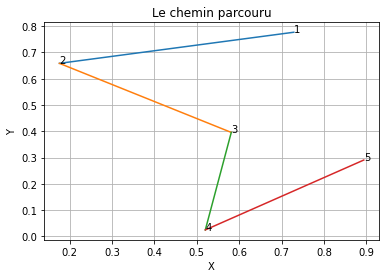

In [24]:
# Créer une nouvelle figure
fig, ax = plt.subplots()
# tracer le chemin entre les points
for i in range(n-1):
    plt.plot([pi[liste[i]-1], pi[liste[i+1]-1]], [pj[liste[i]-1], pj[liste[i+1]-1]], '-')

# afficher le graphique
for i in range(n):
    ax.text(pi[i], pj[i], i+1)
    
# Customize the plot
ax.set_title('Le chemin parcouru')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Show the plot
plt.show()

# 3- L'étude statistique :



In [25]:
coup_optimisePP = 0
coup_pp = 0
coup_tsp=0
v=0
sum_fin=0
appmin=0
for i in range(100):
    pi=np.random.rand(n)
    pj=np.random.rand(n)
    d = np.ma.masked_equal(matriceD(pi,pj), 0.0, copy=False)
    ppv=Ppvoisin(1,d)
    coup_pp+= calcul_coup(ppv)
    #print(calcul_coup(ppv))
    ppvo=OptimisePpvoisin(ppv)
    coup_optimisePP += calcul_coup(ppvo)
    edges1=listdarc1(pi, pj)
    acm=Apminimum1(edges1,n)
    appmin+=poids_total(acm)
    TSP(d)
    sum_fin = final_res+sum_fin
    k=prim(MatAToLV(d))
    sum=0
    for i in k:
        sum=sum+i[2]
    v=v+sum
print("sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme du plus proche voisin est",coup_pp/100)
print("sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de défaire les croisements est",coup_optimisePP/100)
print("sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de l’arête de poids minimum est",appmin/100)
print("sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de l’arbre couvrant de poids minimum est",v/100)
print("sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de l’heuristique de la demi-somme est",sum_fin/100)


sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme du plus proche voisin est 2.739708763703614
sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de défaire les croisements est 2.4473660308361755
sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de l’arête de poids minimum est 1.316182912833208
sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de l’arbre couvrant de poids minimum est 1.316182912833208
sur 100 essais, la longueur moyenne des cycles obtenus par l'algorithme de l’heuristique de la demi-somme est 1.2401438161743379


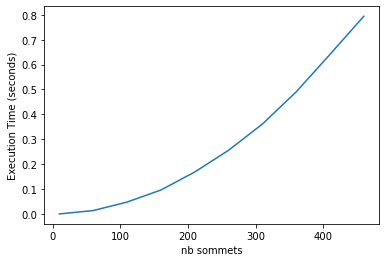

In [26]:
import time

execution_times = []
num_vertices = []

for n in range(10, 500, 50):
    
    pi = np.random.rand(n)
    pj = np.random.rand(n)
    d = np.ma.masked_equal(matriceD(pi,pj), 0.0, copy=False)
    start_time = time.time()
    # Run the algorithm here
    ppv = Ppvoisin(1,d)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    num_vertices.append(n)

# Plot the execution time against the number of vertices
import matplotlib.pyplot as plt
plt.plot(num_vertices, execution_times)
plt.xlabel('nb sommets')
plt.ylabel('Execution Time (seconds)')
plt.show()



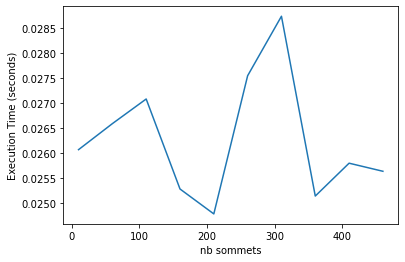

In [27]:
execution_times = []
num_vertices = []

for n in range(10, 500, 50):
    
    pi = np.random.rand(n)
    pj = np.random.rand(n)
    d = np.ma.masked_equal(matriceD(pi,pj), 0.0, copy=False)
    edges1=listdarc1(pi, pj)
    start_time = time.time()
    # Run the algorithm here
    ppvo=OptimisePpvoisin(ppv)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    num_vertices.append(n)

# Plot the execution time against the number of vertices
import matplotlib.pyplot as plt
plt.plot(num_vertices, execution_times)
plt.xlabel('nb sommets')
plt.ylabel('Execution Time (seconds)')
plt.show()

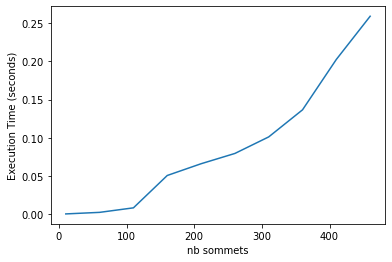

In [28]:
execution_times = []
num_vertices = []

for n in range(10, 500, 50):
    
    pi = np.random.rand(n)
    pj = np.random.rand(n)
    d = np.ma.masked_equal(matriceD(pi,pj), 0.0, copy=False)
    edges1=listdarc1(pi, pj)
    start_time = time.time()
    # Run the algorithm here
    acm=Apminimum1(edges1,n)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    num_vertices.append(n)

# Plot the execution time against the number of vertices
import matplotlib.pyplot as plt
plt.plot(num_vertices, execution_times)
plt.xlabel('nb sommets')
plt.ylabel('Execution Time (seconds)')
plt.show()


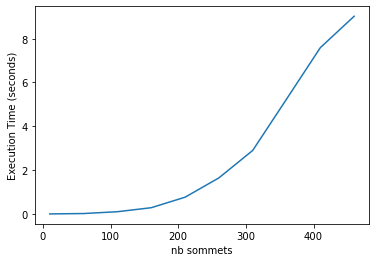

In [29]:
execution_times = []
num_vertices = []

for n in range(10, 500, 50):
    
    pi = np.random.rand(n)
    pj = np.random.rand(n)
    d = np.ma.masked_equal(matriceD(pi,pj), 0.0, copy=False)
    edges1=listdarc1(pi, pj)
    start_time = time.time()
    # Run the algorithm here
    k=Pvcprim(LacToLad(prim(MatAToLV(d))))
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    num_vertices.append(n)

# Plot the execution time against the number of vertices
import matplotlib.pyplot as plt
plt.plot(num_vertices, execution_times)
plt.xlabel('nb sommets')
plt.ylabel('Execution Time (seconds)')
plt.show()

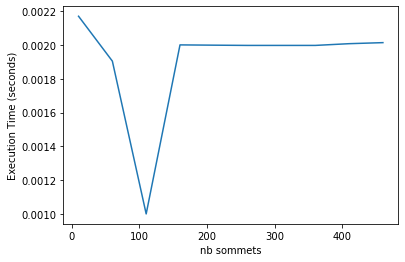

In [30]:
execution_times = []
num_vertices = []

for n in range(10, 500, 50):
    
    pi = np.random.rand(n)
    pj = np.random.rand(n)
    d = np.ma.masked_equal(matriceD(pi,pj), 0.0, copy=False)
    edges1=listdarc1(pi, pj)
    start_time = time.time()
    # Run the algorithm here
    TSP(d)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    num_vertices.append(n)

# Plot the execution time against the number of vertices
import matplotlib.pyplot as plt
plt.plot(num_vertices, execution_times)
plt.xlabel('nb sommets')
plt.ylabel('Execution Time (seconds)')
plt.show()